# Deep Learning Essentials

### Classification with Deep Learning:

#### Preprocessing
Data preparation:

1. Load data into a pandas dataframe
2. Scale the feature dataset
3. Split into training and test datasets

In [2]:
# Import necessary libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets, preprocessing
import tensorflow as tf
import numpy as np

In [5]:
# Retrieve one of the built-in data set in scikit-learn library:
breast_cancer_dict = datasets.load_breast_cancer() # Returns a dictionary

# Put the data in a DataFrame:
breast_cancer_df = pd.DataFrame(data = breast_cancer_dict.data, columns = breast_cancer_dict.feature_names)
breast_cancer_df['target'] = breast_cancer_dict['target']

In [10]:
# Check out the data:
# The features are: 30 attributes, Classes are: M or B (Malignant or Benign)
# Details on data set is available here: https://scikit-learn.org/stable/datasets
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# Split the features and target labels as X and Y data:
X = breast_cancer_df.drop('target', axis = 1)
y = breast_cancer_df['target']

# Preprocess the data: Each feature is in different scales. To make them comparable, we will rescale the data between 0 and 1 using min-max scaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [14]:
# Split the dataset into training and testing data. 20% of the data is kept as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Create the Deep Neural Network model:
Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss function and accuracy measurements

In [29]:
# Creating the model and fitting it to the training data:

# This is a sequential neural network with 4 layers:
# Different types of activation functions are available: https://en.wikipedia.org/wiki/Activation_function
# We'll use here RLU and Sigmoid function.

# Create a sequencial model in Keras:
model = tf.keras.models.Sequential()

# Add the first hidden layer:
model.add(tf.keras.layers.Dense(16,                     # Number of nodes
                                input_shape=(30,),     # Number of input variables
                                name='HL1',             # Layer name 
                                activation = 'relu'     # Activation function
                                ))

# Add the second hidden layer:
model.add(tf.keras.layers.Dense(16,
                                name='HL2',
                                activation = 'relu'
                                ))

# Add an output layer:
model.add(tf.keras.layers.Dense(1,                      # Single output node because this is a binary classification
                             name='OutputLayer',
                             activation='sigmoid'       # We use sigmoid to compute the probability of a class
                             ))

In [30]:
# Compile the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Print the model details:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                     │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

#### Train and evaluate the model:

In [21]:
y_train

209    1
277    0
318    1
296    1
348    1
      ..
374    1
385    0
213    0
384    1
543    1
Name: target, Length: 455, dtype: int32

In [31]:
#Make it verbose so we can see the progress
VERBOSE = 1
#Set Batch size
BATCH_SIZE = 10
#Set number of epochs
EPOCHS = 20
#Set 20% of the training data to be used for validation after each epoch
VALIDATION_SPLIT = 0.2

history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT
          )


# Fit the model to training data and evaluate performance:
#model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 200)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6698 - loss: 0.6693 - val_accuracy: 0.6813 - val_loss: 0.6559
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.6262 - val_accuracy: 0.7143 - val_loss: 0.6047
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.5741 - val_accuracy: 0.7802 - val_loss: 0.5204
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.4616 - val_accuracy: 0.7802 - val_loss: 0.4601
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.4125 - val_accuracy: 0.8791 - val_loss: 0.3772
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8954 - loss: 0.3353 - val_accuracy: 0.9011 - val_loss: 0.3232
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.2714 - val_accuracy: 0.9011 - val_loss: 0.3062
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.2238 - val_accuracy: 0.9011 - val_loss:

In [37]:
# Put the results in a DataFrame:
results_df = pd.DataFrame(history.history)
results_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.662088,0.665312,0.681319,0.655893
1,0.785714,0.610690,0.714286,0.604740
2,0.815934,0.532328,0.780220,0.520389
3,0.870879,0.448547,0.780220,0.460097
4,0.876374,0.376631,0.879121,0.377153


Text(0.5, 0, 'Epochs')

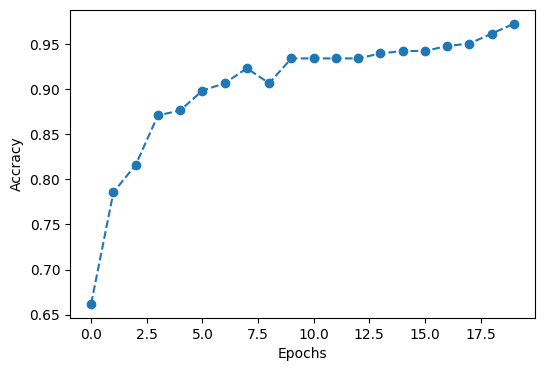

In [50]:
# plot the accuracy over epocs:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(np.linspace(0,19,20), results_df['accuracy'], '--o')
plt.ylabel('Accracy')
plt.xlabel('Epochs')

In [51]:
# Ecaluate the model performance on test data:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0998 


[0.0977897047996521, 0.9736841917037964]

### Save (and load) the model:

In [58]:
#Saving a model
model.save("DNN_breast_cancer_classification.h5")
    
#Loading a Model 
loaded_model = tf.keras.models.load_model("DNN_breast_cancer_classification.h5")

#Print Model Summary
loaded_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                     │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 787 (3.08 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)